In [1]:
# To turn off warning messages
import warnings
warnings.filterwarnings('ignore')

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import joblib

In [2]:
# Load the dataset
df = pd.read_csv('creditcard.csv') 

In [3]:
# Compute correlation matrix
correlation_matrix = df.corr()

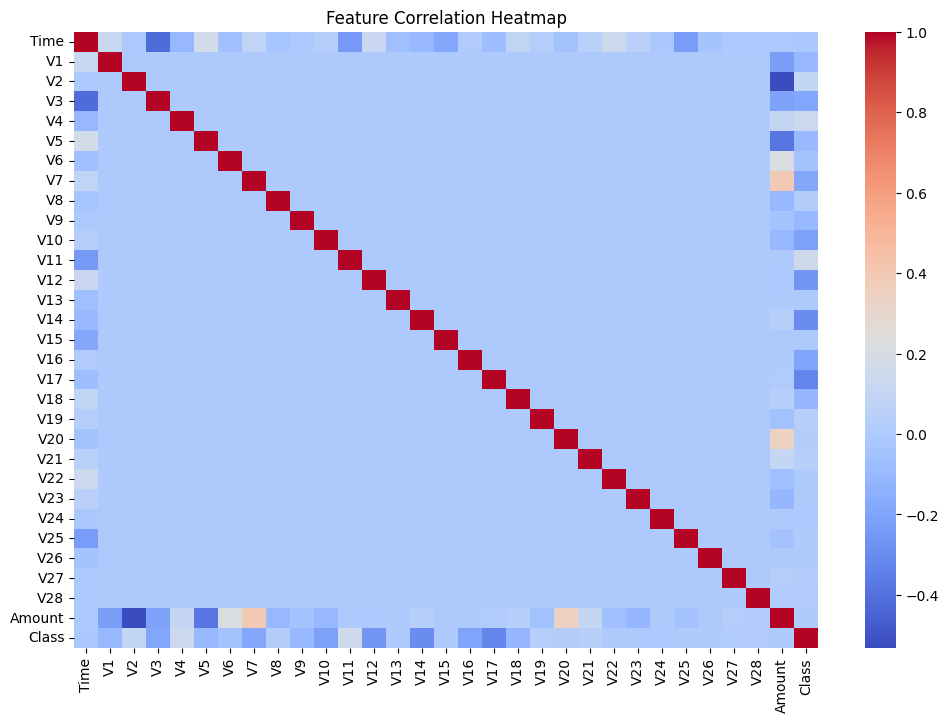

In [4]:
# Display correlation matrix with heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False, fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [5]:
# Correlation with target variable
target_correlation = correlation_matrix["Class"].sort_values(ascending=False)
print("\nCorrelation with target variable (Class):\n", target_correlation)


Correlation with target variable (Class):
 Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
V26       0.004455
V25       0.003308
V22       0.000805
V23      -0.002685
V15      -0.004223
V13      -0.004570
V24      -0.007221
Time     -0.012323
V6       -0.043643
V5       -0.094974
V9       -0.097733
V1       -0.101347
V18      -0.111485
V7       -0.187257
V3       -0.192961
V16      -0.196539
V10      -0.216883
V12      -0.260593
V14      -0.302544
V17      -0.326481
Name: Class, dtype: float64


In [7]:
# Split features and target
X = df.drop(columns=["Class"])
y = df["Class"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

the stratify=y parameter ensures that the class distribution in the training and testing sets remains proportional to the original dataset

In [8]:
# Create a pipeline with scaling and logistic regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(solver='liblinear', class_weight='balanced'))
])

In [9]:
# Define hyperparameter grid for tuning
param_grid = {
    'classifier__C': np.logspace(-3, 3, 7),
    'classifier__penalty': ['l1', 'l2']
}

In [10]:
# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier',
                                        LogisticRegression(class_weight='balanced',
                                                           solver='liblinear'))]),
             n_jobs=-1,
             param_grid={'classifier__C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'classifier__penalty': ['l1', 'l2']},
             scoring='accuracy')

In [11]:
# Best model
best_model = grid_search.best_estimator_

# Make predictions
y_pred = best_model.predict(X_test)

# Print classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.07      0.92      0.12        98

    accuracy                           0.98     56962
   macro avg       0.53      0.95      0.56     56962
weighted avg       1.00      0.98      0.99     56962



In [12]:
# Save the model
model_filename = "logistic_regression_model.pkl"
joblib.dump(best_model, model_filename)
print(f"Model saved to {model_filename}")

Model saved to logistic_regression_model.pkl


In [13]:
# Load the model and make a sample prediction
loaded_model = joblib.load(model_filename)
sample_prediction = loaded_model.predict(X_test[:1])
print("\nSample Prediction:", sample_prediction)


Sample Prediction: [0]


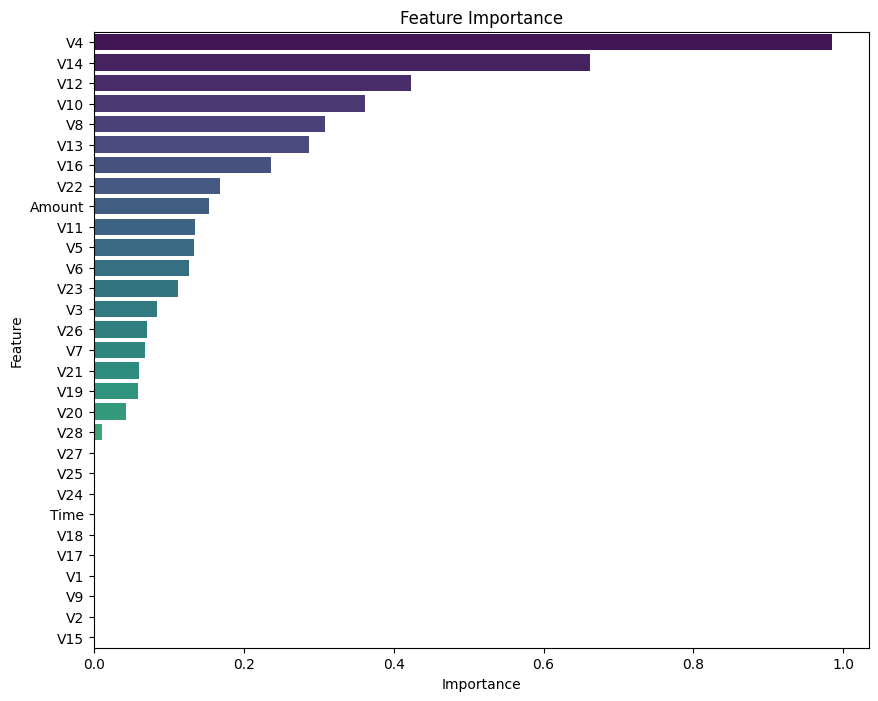

In [16]:
# Visualize feature importance
if hasattr(best_model.named_steps['classifier'], 'coef_'):
    feature_importance = np.abs(best_model.named_steps['classifier'].coef_).flatten()
    feature_names = X.columns
    importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
    importance_df = importance_df.sort_values(by='Importance', ascending=False)
    
    plt.figure(figsize=(10, 8))
    sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
    plt.title('Feature Importance')
    plt.show()
